### Indicizzazione Booleana

Un altro modo estremamente utile per ottenere dati dagli array NumPy è l'indicizzazione booleana, che consente di utilizzare tutti i tipi di operatori logici:

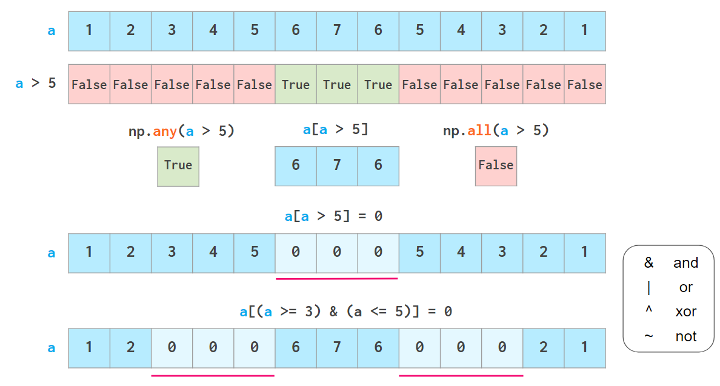

Attenzione però: i confronti "ternari" in Python come 3<=a<=5 non funzionano qui.


In [10]:
import numpy as np
a = np.array([1,2,3,4,5,6,7,6,5,4,3,2,1])

a>5, a[a>5], np.any(a>5), np.all(a>5)

(array([False, False, False, False, False,  True,  True,  True, False,
        False, False, False, False]),
 array([6, 7, 6]),
 np.True_,
 np.False_)

In [11]:
# Supponiamo di lavorare con dati sulle vendite di automobili, 
# di avere il valore di tutte le auto vendute lo scorso anno
# E di voler identificare le vendite superiori a **30.000$**.  

vendite = np.array([34_255, 27_222, 42_250, 12_000])
vendite

array_vero_falso = vendite > 30_000
array_valori_veri = vendite[vendite > 30_000]

array_vero_falso, array_valori_veri

(array([ True, False,  True, False]), array([34255, 42250]))

## Where

* `np.where` controlla gli elementi di un array in base a una condizione e assegna un valore se la condizione è vera e un altro se è falsa.
* Sintassi: `np.where(condition, x, y)`.
* Viene comunemente utilizzato per sostituire condizionalmente elementi di un array.

In [12]:
vendite = np.array([34_255, 27_222, 42_250, 12_000])

np.where(vendite>30000)

(array([0, 2]),)

Con un solo argomento torna una tupla con un array con gli indici dell'array per cui gli elementi soddisfano la condizione

In [13]:
np.where(vendite>30000)[0]

array([0, 2])

### Esempio

Sostituiremo tutti i valori in `vendite` inferiori a 30.000 con 30.000 (per applicare una soglia minima di costo).  
Utilizzeremo questa sintassi: `np.where(condition, x, y)`, dove:
* Se la `condition` è vera → assegniamo `x`.
* Se la `condition` è falsa → assegniamo `y`.

In [15]:
# Replace values using np.where
salary_array = np.where(vendite < 30000, 30000, vendite)
salary_array

array([34255, 30000, 42250, 30000])

## Operazioni Matematiche

* Funzioni aggregate:
    * `sum`: somma
    * `prod`: prodotto
    * `cumsum`: somma cumulativa
    * `cumprod`: prodotto cumulativo
* Operazioni matematiche (non approfondiremo questo argomento durante il corso):
    * `sqrt` 
    * `exp` 
    * `log` 
    * `sin` 
    * `cos`

### Esempi

Per prima cosa, creiamo un elenco con 10 stipendi annuali per un Senior Data Analyst.  
Utilizzeremo la libreria `random` per generare numeri interi casuali compresi tra 100000 e 150000.  
Poi useremo un ciclo `for` per ottenere 10 valori casuali.


In [17]:
import random 

salary = [random.randint(100000, 150000) for num in range(10)]

In [18]:
salary

[108478,
 108981,
 114192,
 140917,
 104553,
 126395,
 100039,
 103167,
 113385,
 140831]

Ora convertiremo questa lista in un array di NumPy.


In [19]:
salary_array = np.array(salary)
salary_array

array([108478, 108981, 114192, 140917, 104553, 126395, 100039, 103167,
       113385, 140831])

### Somma

Calcolare la somma totale degli elementi nell'array `salary_array`.


In [20]:
total_sum_salaries = np.sum(salary_array)
total_sum_salaries

np.int64(1160938)

### Prodotto

Calcolare il prodotto degli elementi nell'array `salary_array`.


In [21]:
product_salaries = np.prod(salary_array)
product_salaries

np.int64(-6314375044132793504)

### Cumsum (Somma Cumulativa)

Calcola la somma cumulativa degli elementi dell'array `salary_array`.  
Ogni elemento nell'array di output rappresenta la somma di tutti gli elementi precedenti, incluso l'elemento corrente dell'array originale.

Cioè:

* Il primo elemento della somma cumulativa è il primo elemento dell'array.
* Il secondo elemento è la somma dei primi due elementi dell'array
* Il terzo elemento è la somma dei primi tre elementi dell'array
* E così via...


In [22]:
cumulative_sum_salaries = np.cumsum(salary_array)
cumulative_sum_salaries

array([ 108478,  217459,  331651,  472568,  577121,  703516,  803555,
        906722, 1020107, 1160938])

### Cumprod (Prodotto Cumulativo)

Calcola il prodotto cumulativo degli elementi dell'array `salary_array`.  
Ogni elemento nell'array di output rappresenta il prodotto di tutti gli elementi precedenti, incluso l'elemento corrente dell'array originale.

In [ ]:
# Cumulative product of 'job_no_degree_mention' column (conceptual example)
cumulative_prod_salaries = np.cumprod(salary_array)
cumulative_prod_salaries

**Nota**: A causa dei numeri elevati, i valori del prodotto cumulativo aumentano rapidamente fino a superare il limite numerico per i tipi di dati tipici in Python, causando un overflow degli interi.  
Per questo motivo, alcuni numeri possono apparire come negativi.


### Prodotto scalare e vettoriale

In [23]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# Prodotto scalare (dot product)
dot_product = np.dot(v1, v2)  
dot_product2 = v1 @ v2

# Prodotto vettoriale (cross product)
cross_product = np.cross(v1, v2)

dot_product, dot_product2, cross_product

(np.int64(32), np.int64(32), array([-3,  6, -3]))

## Operazioni Statistiche


Molte di queste operazioni possono essere eseguite anche con Pandas, poiché Pandas è costruito su NumPy.  
Ecco alcuni esempi, ma non approfondiremo questi concetti nel dettaglio.

* `mean`: media
* `median`: mediana
* `var`: varianza
* `std`: deviazione standard
* `min`: valore minimo
* `max`: valore massimo


### Media

Calcolare lo stipendio medio nell'array `salary_array`.


In [24]:
import random 
import numpy as np

salary_array = np.array([random.randint(100000, 150000) for num in range(10)])

average_salary = np.mean(salary_array)
average_salary

np.float64(129332.8)

### Mediana

Trovare la mediana dello stipendio nell'array `salary_array`.


In [25]:
median_salary = np.median(salary_array)
median_salary

np.float64(132109.5)

### Varianza

Calcolare la varianza dell'array `salary_array`.


In [26]:
salary_variance = np.var(salary_array, ddof=1)  # ddof=1 per la varianza campionaria
salary_variance

np.float64(233922228.62222221)

### Std

Calculate the standard deviation of the `salary_array`.

In [ ]:
# Standard deviation of 'salary_year_avg' column
salary_std_dev = np.std(salary_array, ddof=1)  # ddof=1 per la deviazione standard campionaria
salary_std_dev

### Min

Trovare l'elemento minimo nell'array `salary_array`.


In [27]:
# Minimum of 'salary_year_avg' column
min_salary = np.min(salary_array)
min_salary

np.int64(104387)

### Max

Trovare l'elemento massimo nell'array `salary_array`.


In [28]:
# Maximum of 'salary_year_avg' column
max_salary = np.max(salary_array)
max_salary

np.int64(147289)

### argmax ed argmin

Ritornano gli indici della prima occorrenza dell'elemento massimo/minimo nell'array `salary_array`.

In [29]:
np.argmax(np.array([1,2,3,3,1]))

np.int64(2)

In [30]:
salary_with_none = np.array([123124, None, 145000, 128000, 110000, 149999,  None, 135000, 115000, 140000])
salary_with_none * 10


TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

## NaN

* Generare valori NaN usando `np.nan`
* Il valore `np.nan` è utilizzato in NumPy (e, per estensione, in Pandas) per rappresentare dati mancanti o indefiniti
* Utile perché:
    * Gestisce i dati mancanti.
    * Aiuta nei calcoli, poiché non genera errori ma restituisce `np.nan`.
    * Permette di filtrare o riempire i dati mancanti usando metodi che utilizzeremo spesso nella libreria `pandas`, come `dropna()`, `fillna()`, `isna()`, o `notna()`.

### Esempi

Di seguito alcuni esempi di utilizzo.


#### Inserire Valori Mancanti

Se vuoi inserire intenzionalmente valori mancanti nel tuo array, magari per indicare che i dati sono previsti ma non ancora disponibili, puoi usare `np.nan`.


In [31]:
salary_with_nan = np.array([123124, np.nan, 145000, 128000, 110000, 149999, np.nan, 135000, 115000, 140000])
salary_with_nan

array([123124.,     nan, 145000., 128000., 110000., 149999.,     nan,
       135000., 115000., 140000.])

#### Sostituire Valori con NaN

Se vuoi sostituire i valori esistenti con `np.nan`, ad esempio se alcuni valori sono considerati non validi o outlier:


In [32]:
salary_with_nan[salary_with_nan < 130000] = np.nan
salary_with_nan

array([    nan,     nan, 145000.,     nan,     nan, 149999.,     nan,
       135000.,     nan, 140000.])

## Campionamento Casuale

* Generare numeri o campioni casuali.
* `np.random.normal` - estrae campioni casuali da una distribuzione normale (gaussiana).
    * Specificare gli argomenti:
        * `loc`: La media (`μ`) della distribuzione normale.
        * `scale`: La deviazione standard (`σ`) della distribuzione normale, che rappresenta la dispersione rispetto alla media.
        * `size`: Definisce il numero di campioni casuali da generare
    * Sintassi: `np.random.normal(loc=0.0, scale=1.0, size=None)`


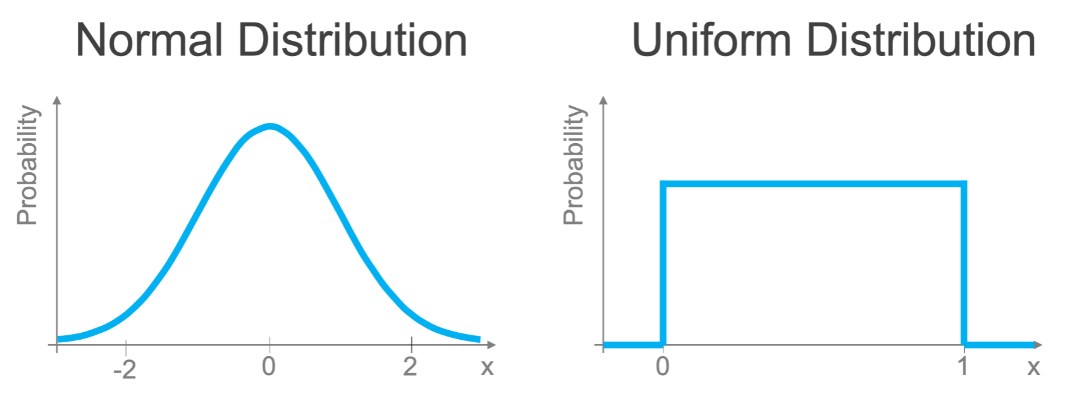

* Altre funzioni di campionamento casuale:
    * `np.random.rand`
    * `np.random.randn`
    * `np.random.randint`
    * `np.random.random`
    * `np.random.uniform`
    * `np.random.binomial`
    * `np.random.poisson`

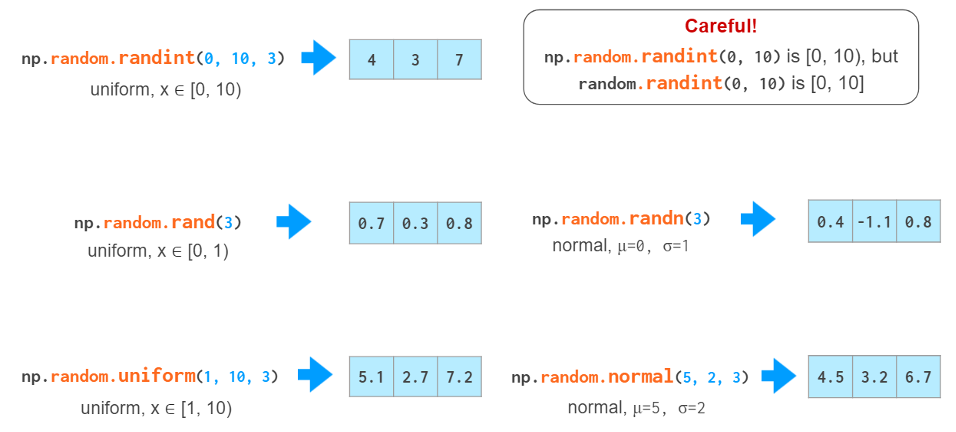


### Esempio

Aggiungiamo un po' di rumore casuale all'array `salary_array` per simulare variazioni salariali.  
Possiamo generare valori casuali da una distribuzione normale con una media di 0 e una deviazione standard di 5000, quindi aggiungere questi valori agli stipendi.

**Perché?**  
Questo può essere utile per simulare dati salariali nelle offerte di lavoro quando i dati effettivi non sono disponibili, ad esempio in scenari di modellazione o simulazione.


In [39]:
# Generare numeri basati su una distribuzione normale
noise = np.random.normal(0, 5000, salary_array.size)

# Aggiungere questi numeri all'array degli stipendi
salary_array_with_noise = salary_array + noise

salary_array, noise, salary_array_with_noise


(array([147289, 130496, 113630, 142144, 124822, 104387, 133723, 141116,
        144679, 111042]),
 array([  715.42893829,  2090.98415375, -1558.62552203, -2406.45416564,
        -5644.13214655,  7592.46481793,  4806.43911227,  2766.2057205 ,
        -7195.23960846,  2682.86218112]),
 array([148004.42893829, 132586.98415375, 112071.37447797, 139737.54583436,
        119177.86785345, 111979.46481793, 138529.43911227, 143882.2057205 ,
        137483.76039154, 113724.86218112]))

C'è anche una nuova interfaccia per la generazione di array casuali, più adatta al multi-threading, un po' più veloce, più configurabile 

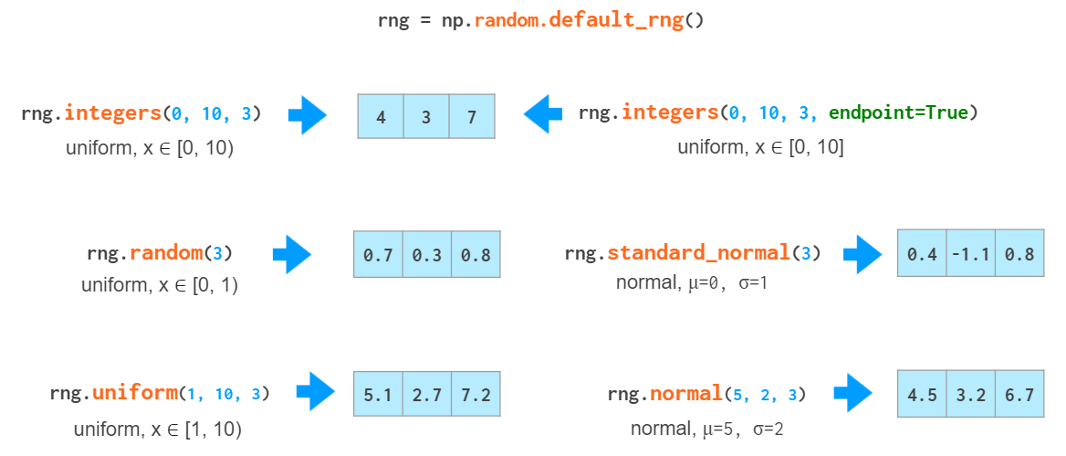

## Comparizione di numeri float

Comparare array di float in NumPy può essere complicato a causa della precisione numerica dei numeri in virgola mobile. Ecco alcuni modi comuni per confrontare array di float in NumPy.

np.isclose permette di confrontare float tenendo conto di un margine di tolleranza.

In [41]:
a = np.array([0.1 + 0.2, 0.3])
b = np.array([0.3, 0.3])

a == b, np.isclose(a, b)

(array([False,  True]), array([ True,  True]))

In [42]:
# posso anche scegliere con che tolleranza controllare
np.isclose(a, b, atol=1e-6) #absolute tolerance, errore massimo accettabile.

array([ True,  True])

Posso anche la tolleranza relativa, cioè $\frac{\lvert a - b \rvert}{ \lvert b \rvert} \leq rtol $

In [43]:
a = np.array([1000.0, 0.00001, 50000.0])
b = np.array([1000.1, 0.000011, 50001.0])

np.isclose(a, b, rtol=1e-4)  #relative tolerance, errore relativo rispetto ai valori confrontati.

array([ True, False,  True])

### Caricare e Salvare file in numpy

Inaspettatamente NumPy fornisce diverse funzioni per caricare dati da file, tra cui np.loadtxt, np.genfromtxt e np.load

In [46]:
passeggeri = np.loadtxt('../../dati/data.csv', delimiter=",", dtype=str)
passeggeri

array([['date', 'passengers'],
       ['1949-01', '112'],
       ['1949-02', '118'],
       ['1949-03', '132'],
       ['1949-04', '129'],
       ['1949-05', '121'],
       ['1949-06', '135'],
       ['1949-07', '148'],
       ['1949-08', '148'],
       ['1949-09', '136'],
       ['1949-10', '119'],
       ['1949-11', '104'],
       ['1949-12', '118'],
       ['1950-01', '115'],
       ['1950-02', '126'],
       ['1950-03', '141'],
       ['1950-04', '135'],
       ['1950-05', '125'],
       ['1950-06', '149'],
       ['1950-07', '170'],
       ['1950-08', '170'],
       ['1950-09', '158'],
       ['1950-10', '133'],
       ['1950-11', '114'],
       ['1950-12', '140'],
       ['1951-01', '145'],
       ['1951-02', '150'],
       ['1951-03', '178'],
       ['1951-04', '163'],
       ['1951-05', '172'],
       ['1951-06', '178'],
       ['1951-07', '199'],
       ['1951-08', '199'],
       ['1951-09', '184'],
       ['1951-10', '162'],
       ['1951-11', '146'],
       ['1951-12', '166'

Ma è molto limitato in questa funzione. Non gestisce bene valori mancanti.

Non funziona con file di grandi dimensioni in modo efficiente.

In [49]:
# Generazione di 200 valori casuali di emissioni di CO2 in tonnellate per anno 
# Supponiamo emissioni tra 4 e 20 tonnellate per persona 
co2_emissions = np.round(np.random.uniform(4, 20, 200), 2)

# Nome del file di output
output_file = "../../dati/emissioni.txt"

# Salvataggio su file
np.savetxt(output_file, co2_emissions, fmt="%.2f")

# Restituisco il percorso del file
output_file

'../../dati/emissioni.txt'

## Lavorare con matrici

L'inizializzazione di matrici è simile a quella dei vettori

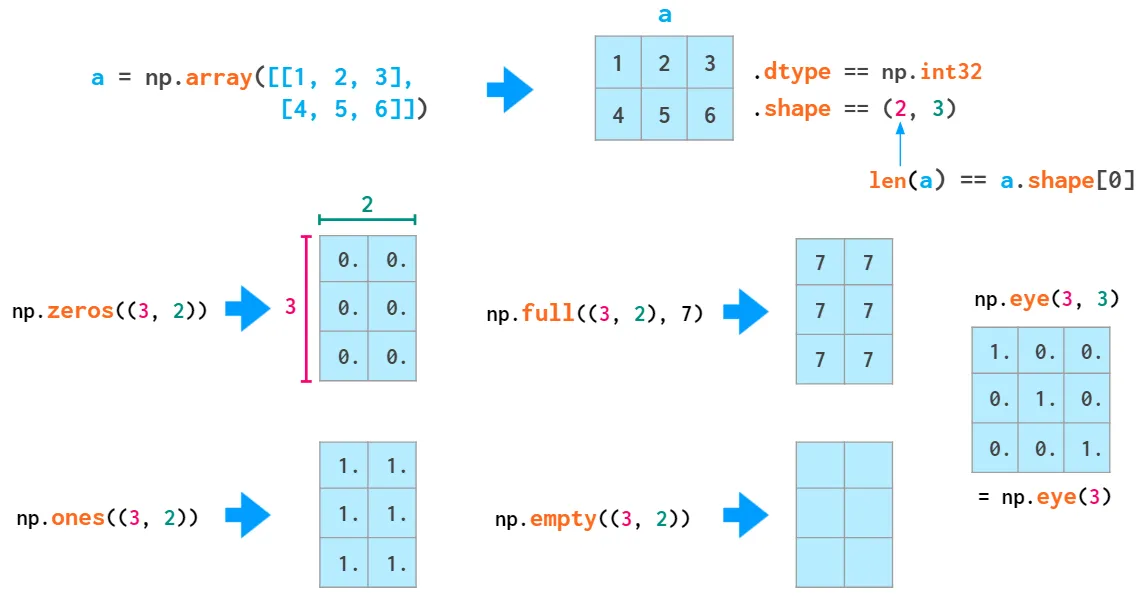

Le doppie parentesi sono necessarie qui perché il secondo parametro posizionale è riservato al dtype (opzionale), che accetta anche numeri interi.

In [50]:
# Creazione di array bidimensionali (matrici)
matrice = np.array([[1, 2, 3], [4, 5, 6]])
matrice

array([[1, 2, 3],
       [4, 5, 6]])

`.shape` mi da le dimensioni della mia matrice, numero di righe e colonne

In [51]:
matrice.shape

(2, 3)

In [52]:
# Creare un array bidimensionale di zeri:
zero_2d = np.zeros((3, 2))
print(zero_2d)


[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [53]:
# Creazione di una mtrice di uni
ones_2d = np.ones((2, 3, 4))
print(ones_2d)


[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


In [54]:
#Creare una matrice con valori casuali:
random_2d = np.random.rand(2, 3)
print(random_2d)


[[0.88508246 0.41938263 0.08806988]
 [0.33485317 0.36890212 0.67356329]]


In [57]:
# Creare una matrice con arrange e shape
np.arange(20).reshape((4, 5))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [60]:
a = [[1,2,3], [4,5,6]]
a[0][-1]

3

La sintassi di indicizzazione bidimensionale è più comoda rispetto a quella delle liste annidate.

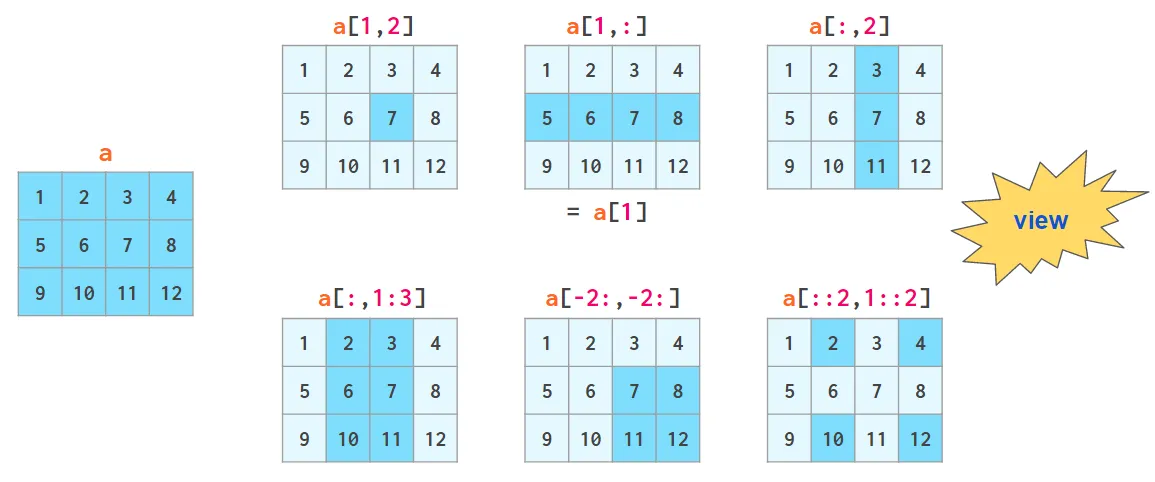

### Il  fancy indexing

Permette di selezionare più elementi di una matrice, utilizzando array di indici, invece di un singolo valore o di slicing

In [64]:
a = np.array([[10, 20, 30], 
              [40, 50, 60], 
              [70, 80, 90]])

righe = np.array([0,0, 2, 2])  # Seleziona la riga 0 e la riga 2
colonne = np.array([1,2,1, 2])  # Seleziona la colonna 1 e la colonna 2

a[righe, colonne] 

array([20, 30, 80, 90])

### Il concetto di Axis in NumPy

In molte operazioni, come la somma, è necessario specificare a NumPy se l'operazione deve essere eseguita sulle righe o sulle colonne.  
Per avere una notazione universale che funzioni con un numero arbitrario di dimensioni, NumPy introduce il concetto di **asse (`axis`)**.  
si
- Il primo indice corrisponde a `axis=0`.  
- Il secondo indice corrisponde a `axis=1`, e così via.  

Nel caso di un array 2D:
- `axis=0` opera sulle colonne, cioè esegue l'operazione lungo le righe.  
- `axis=1` opera sulle righe, cioè esegue l'operazione lungo le colonne.  


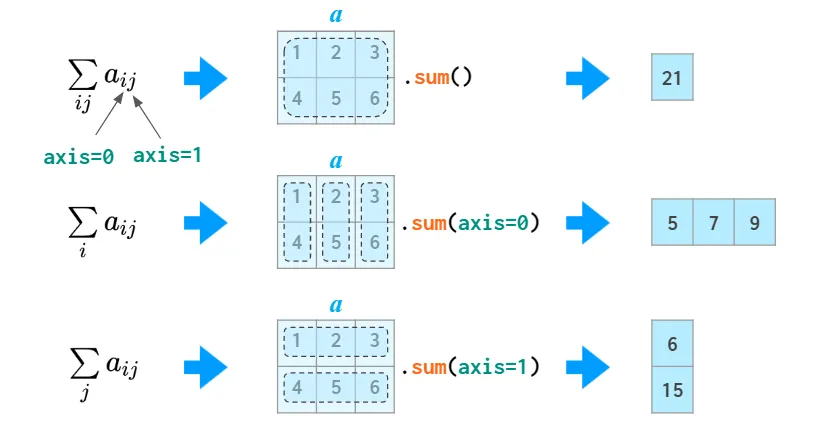

In [65]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.sum(), a.sum(0), a.sum(axis=1)

(np.int64(21), array([5, 7, 9]), array([ 6, 15]))

### Operazioni tra matrici

In [66]:
np.array([[1, 2], [3, 4]])/100

array([[0.01, 0.02],
       [0.03, 0.04]])

In [67]:
# addizione e sottrazione tra array
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

C = A + B
print(C)

D = A - B
print(D)


[[ 6  8]
 [10 12]]
[[-4 -4]
 [-4 -4]]


In [68]:
# moltiplicazione elemente per elemento
E = A * B
print(E)


[[ 5 12]
 [21 32]]


In [69]:
# trasposizione 
H1 = A.transpose()
H2 = A.T
print(A,"\n H1:", H1,"\n H2:", H2)


[[1 2]
 [3 4]] 
 H1: [[1 3]
 [2 4]] 
 H2: [[1 3]
 [2 4]]


In [70]:
# inversione 
I = np.linalg.inv(A)
print(I)


[[-2.   1. ]
 [ 1.5 -0.5]]


In [71]:
# Creazione di array tridimensionali
array_3d = np.array([[[ 1,  2,  3],  [ 4 , 5 , 6]]

,[[ 7,  8 , 9],
  [10, 11 ,12]]

 ,[[13, 14, 15],
  [16, 17, 18]]])

array_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])

In [72]:
# Creazione di array tridimensionali di uni
ones_3d = np.ones((2, 3, 4))
print(ones_3d)


[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


In [73]:
#Creare un array tridimensionale con valori casuali:
random_3d = np.random.rand(2, 3, 4)
print(random_3d)


[[[0.20625309 0.44273313 0.29964346 0.47517648]
  [0.37542991 0.57717806 0.08708974 0.25539529]
  [0.01461729 0.56904239 0.33896704 0.36079011]]

 [[0.60651475 0.45726254 0.45879025 0.40316815]
  [0.32678493 0.85555326 0.39211185 0.9422033 ]
  [0.89328972 0.86911978 0.24122817 0.51884675]]]


### Broadcasting
Consente di eseguire operazioni tra array di forme diverse senza doverli ridimensionare manualmente.
Invece di ripetere i dati più volte per adattare le forme, NumPy espande automaticamente gli array in modo efficiente.

Per applicare il broadcasting, NumPy segue queste tre regole:

1. Se una dimensione è 1, viene replicata per adattarsi all'altra dimensione.

In [74]:
A = np.array([[1, 2, 3], 
              [4, 5, 6]])  # (2,3)

B = 10  # Scalare

A + B

array([[11, 12, 13],
       [14, 15, 16]])

2. Se gli array hanno dimensioni diverse, quello più piccolo viene espanso.

In [75]:
A = np.array([10, 20, 30])  # (3,) → Array 1D con 3 elementi
B = np.array([[1], [2], [3]])  # (3,1) → Array 2D con 3 righe e 1 colonna

A + B #Quando sommiamo A + B, NumPy espande A a (3,3) per adattarlo alla forma di B e similmente per B

array([[11, 21, 31],
       [12, 22, 32],
       [13, 23, 33]])

3. Se le dimensioni non sono compatibili e nessuna è 1, il broadcasting fallisce.

In [76]:
A = np.array([[1, 2, 3], 
              [4, 5, 6]])  # (2,3)

B = np.array([10, 20])  # (2,)

A + B  # Errore! Le dimensioni non sono compatibili.

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

### Vectorization

La **vettorizzazione del codice** è una tecnica che permette di scrivere codice più **veloce** e **leggibile**.  
Consiste nell'eseguire operazioni su un **insieme di valori contemporaneamente**, anziché iterare esplicitamente sugli elementi uno per uno con un ciclo.

La differenza può essere facilmente osservata con un esempio semplice.  

In [77]:
a = np.arange(1000000) 
b = np.arange(1000000)

In [78]:
%%timeit
# Approccio non vettorizzato con un ciclo for
c = []  # Iniziamo con un array vuoto che popoleremo nel ciclo
for i in range(len(a)):
    c.append(a[i] + b[i])

106 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [79]:
%%timeit
# Approccio vettorizzato
c = a + b

632 μs ± 34.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
